# DL_101: Tricks

## L2, L1 Regularization and Dropout

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" # prevents a restart of the kernel

import numpy as np
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.initializers import *

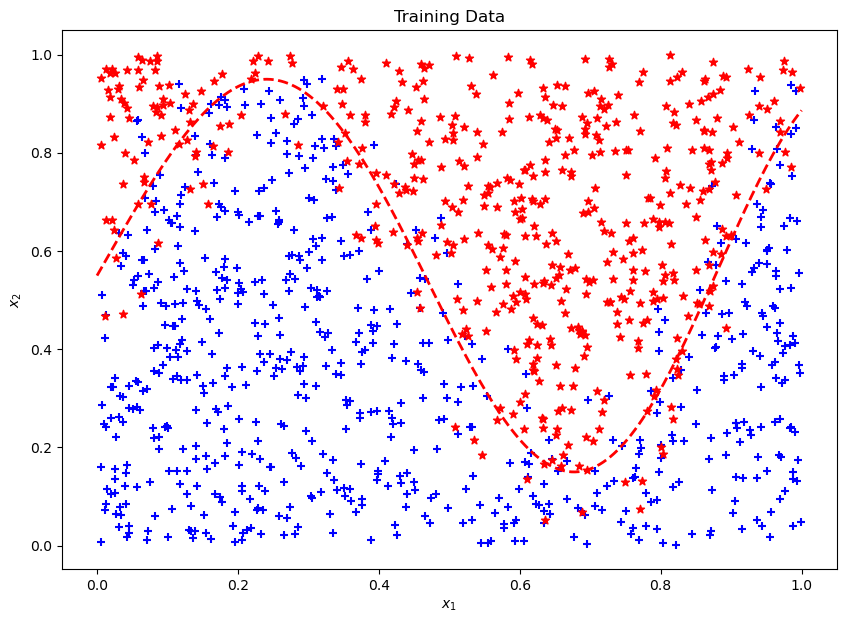

In [2]:
np.random.seed(42)

X = np.random.rand(1200,2)
groupeA = 0.4 * np.sin(2 * np.pi * X[:,0] + X[:,0]**2) + 0.55 > X[:,1]
groupeB = 0.4 * np.sin(2 * np.pi * X[:,0] + X[:,0]**2) + 0.55 <= X[:,1]
Y = np.zeros(X.shape[0])
Y[groupeA], Y[groupeB] = 1, -1

#Einbringen von Rauschen
groupeE = np.abs((0.4 * np.sin(2 * np.pi * X[:,0] + X[:,0]**2) + 0.55) - X[:,1]) < 0.2
index = np.flatnonzero(groupeE)
flip = np.random.rand(index.shape[0]) < 1/4 

Y[index[flip]] = (-1) * Y[index[flip]]
#Neue Gruppenbildung nach Verteilung der random Abweichung von 0.2
groupeAdata = Y>0
groupeBdata = Y<0
XTrain = X
YTrain = np.zeros((X.shape[0],2))
YTrain[groupeAdata,0] = 1
YTrain[groupeBdata,1] = 1

t = np.linspace(0,1,200)
b = 0.4 * np.sin(2 * np.pi * t + t**2) + 0.55
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[groupeAdata,0], X[groupeAdata,1], marker='+', c='blue')
ax.scatter(X[groupeBdata,0], X[groupeBdata,1], marker='*', c='r')
ax.plot(t, b, 'r--', lw=2)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Training Data')
plt.show()

## Hyperparameters

In [11]:

epochs = 500
batch_size = 32
activation_hidden = "relu"
activation_out = "sigmoid"
optimizer = Adam
loss = "mse"
metrics = "accuracy"
lr = 0.005

## No Regularization

Epoch 1/500
38/38 [==============================] - 2s 4ms/step - loss: 0.2021 - accuracy: 0.7158
Epoch 2/500
38/38 [==============================] - 0s 5ms/step - loss: 0.1440 - accuracy: 0.7992
Epoch 3/500
38/38 [==============================] - 0s 5ms/step - loss: 0.1349 - accuracy: 0.8083
Epoch 4/500
38/38 [==============================] - 0s 5ms/step - loss: 0.1192 - accuracy: 0.8392
Epoch 5/500
38/38 [==============================] - 0s 5ms/step - loss: 0.1326 - accuracy: 0.8217
Epoch 6/500
38/38 [==============================] - 0s 6ms/step - loss: 0.1016 - accuracy: 0.8608
Epoch 7/500
38/38 [==============================] - 0s 8ms/step - loss: 0.0974 - accuracy: 0.8550
Epoch 8/500
38/38 [==============================] - 0s 7ms/step - loss: 0.0924 - accuracy: 0.8683
Epoch 9/500
38/38 [==============================] - 0s 7ms/step - loss: 0.0945 - accuracy: 0.8625
Epoch 10/500
38/38 [==============================] - 0s 7ms/step - loss: 0.0933 - accuracy: 0.8658
Epoch 11/

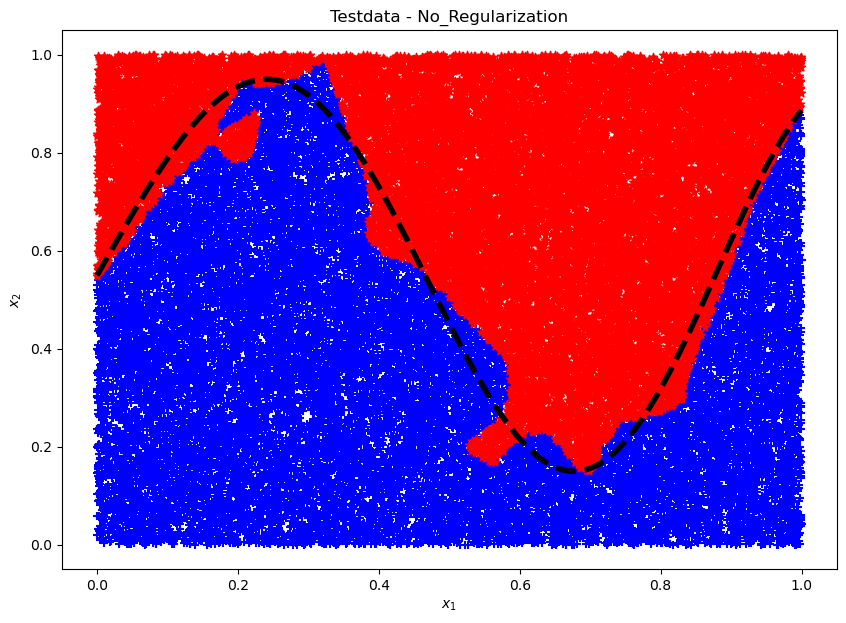

In [7]:

model = Sequential()
model.add(Dense(256, input_dim=2, kernel_initializer='normal'))
model.add(Activation(activation_hidden))
model.add(Dense(256, kernel_initializer='random_uniform'))
model.add(Activation(activation_hidden))
model.add(Dense(128, kernel_initializer='random_uniform'))
model.add(Activation(activation_hidden))
model.add(Dense(128, kernel_initializer='random_uniform'))
model.add(Activation(activation_hidden))
model.add(Dense(2, kernel_initializer='normal'))
model.add(Activation(activation_out))

model.compile(loss=loss, optimizer=optimizer(learning_rate=lr), metrics=[metrics])
model.fit(XTrain, YTrain, epochs=epochs, batch_size=batch_size)
model.summary()


XTest = np.random.rand(40000,2)
yp = model.predict(XTest)
groupeAp = yp[:,0] > yp[:,1]
groupeBp = yp[:,1] > yp[:,0]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
ax.scatter(XTest[groupeAp,0], XTest[groupeAp,1], marker='+', c='blue')
ax.scatter(XTest[groupeBp,0], XTest[groupeBp,1], marker='*', c='r')
ax.plot(t, b, 'k--', lw=4)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Test Data - No Regularization')
# plt.savefig('Demonstration_L2_Regularization.svg',dpi=100)
plt.show()


## L2 - Regularization

Epoch 1/500
38/38 [==============================] - 6s 37ms/step - loss: 0.2202 - accuracy: 0.6458
Epoch 2/500
38/38 [==============================] - 2s 50ms/step - loss: 0.1665 - accuracy: 0.7592
Epoch 3/500
38/38 [==============================] - 2s 48ms/step - loss: 0.1630 - accuracy: 0.7658
Epoch 4/500
38/38 [==============================] - 2s 52ms/step - loss: 0.1591 - accuracy: 0.7808
Epoch 5/500
38/38 [==============================] - 1s 14ms/step - loss: 0.1519 - accuracy: 0.7800
Epoch 6/500
38/38 [==============================] - 2s 47ms/step - loss: 0.1504 - accuracy: 0.7883
Epoch 7/500
38/38 [==============================] - 0s 10ms/step - loss: 0.1494 - accuracy: 0.8042
Epoch 8/500
38/38 [==============================] - 2s 49ms/step - loss: 0.1327 - accuracy: 0.8250
Epoch 9/500
38/38 [==============================] - 0s 5ms/step - loss: 0.1304 - accuracy: 0.8383
Epoch 10/500
38/38 [==============================] - 0s 5ms/step - loss: 0.1231 - accuracy: 0.8433
E

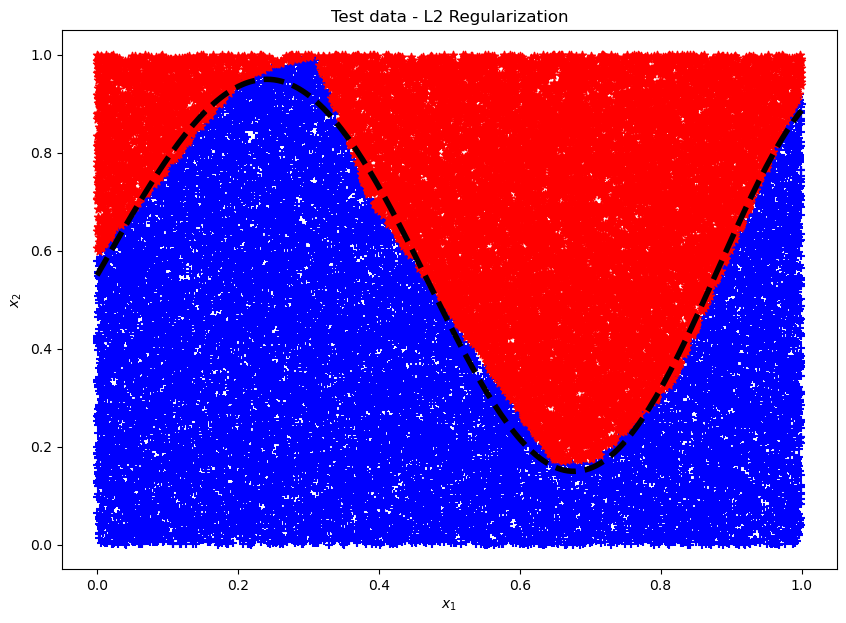

In [12]:

model = Sequential()
model.add(Dense(256, input_dim=2, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation(activation_hidden))
model.add(Dense(256, kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation(activation_hidden))
model.add(Dense(128, kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation(activation_hidden))
model.add(Dense(128, kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation(activation_hidden))
model.add(Dense(2, kernel_initializer='normal'))
model.add(Activation(activation_out))

model.compile(loss=loss, optimizer=optimizer(learning_rate=lr), metrics=[metrics])
model.fit(XTrain, YTrain, epochs=epochs, batch_size=batch_size)
model.summary()


XTest = np.random.rand(40000,2)
yp = model.predict(XTest)
groupeAp = yp[:,0] > yp[:,1]
groupeBp = yp[:,1] > yp[:,0]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
ax.scatter(XTest[groupeAp,0], XTest[groupeAp,1], marker='+', c='blue')
ax.scatter(XTest[groupeBp,0], XTest[groupeBp,1], marker='*', c='r')
ax.plot(t, b, 'k--', lw=4)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Test data - L2 Regularization')

plt.show()




## L1 - Regularization

In [ ]:

model = Sequential()
model.add(Dense(256, input_dim=2, kernel_initializer='normal', kernel_regularizer=regularizers.l1(0.00001)))
model.add(Activation(activation_hidden))
model.add(Dense(256, kernel_initializer='random_uniform', kernel_regularizer=regularizers.l1(0.00001)))
model.add(Activation(activation_hidden))
model.add(Dense(128, kernel_initializer='random_uniform', kernel_regularizer=regularizers.l1(0.00001)))
model.add(Activation(activation_hidden))
model.add(Dense(128, kernel_initializer='random_uniform', kernel_regularizer=regularizers.l1(0.00001)))
model.add(Activation(activation_hidden))
model.add(Dense(2, kernel_initializer='normal'))
model.add(Activation(activation_out))

model.compile(loss=loss, optimizer=optimizer(learning_rate=lr), metrics=[metrics])
model.fit(XTrain, YTrain, epochs=epochs, batch_size=batch_size)
model.summary()


XTest = np.random.rand(40000,2)
yp = model.predict(XTest)
groupeAp = yp[:,0] > yp[:,1]
groupeBp = yp[:,1] > yp[:,0]



fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
ax.scatter(XTest[groupeAp,0], XTest[groupeAp,1], marker='+', c='blue')
ax.scatter(XTest[groupeBp,0], XTest[groupeBp,1], marker='*', c='r')
ax.plot(t, b, 'k--', lw=4)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Testdata - L1_Regularization')
plt.show()

Epoch 1/500
38/38 [==============================] - 5s 9ms/step - loss: 0.2319 - accuracy: 0.5667
Epoch 2/500
38/38 [==============================] - 0s 13ms/step - loss: 0.1910 - accuracy: 0.7258
Epoch 3/500
38/38 [==============================] - 0s 11ms/step - loss: 0.1869 - accuracy: 0.7517
Epoch 4/500
38/38 [==============================] - 0s 11ms/step - loss: 0.1771 - accuracy: 0.7642
Epoch 5/500
38/38 [==============================] - 1s 16ms/step - loss: 0.1664 - accuracy: 0.7892
Epoch 6/500
38/38 [==============================] - 0s 10ms/step - loss: 0.1555 - accuracy: 0.8067
Epoch 7/500
38/38 [==============================] - 0s 10ms/step - loss: 0.1508 - accuracy: 0.8142
Epoch 8/500
38/38 [==============================] - 0s 8ms/step - loss: 0.1432 - accuracy: 0.8308
Epoch 9/500
38/38 [==============================] - 0s 8ms/step - loss: 0.1366 - accuracy: 0.8317
Epoch 10/500
38/38 [==============================] - 0s 7ms/step - loss: 0.1366 - accuracy: 0.8308
Epo

## L2 + Dropout

In [ ]:
# L2 - Regularization
model = Sequential()
model.add(Dense(256, input_dim=2, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation(activation_hidden))
model.add(Dropout(0.5))
model.add(Dense(256, kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation(activation_hidden))
model.add(Dropout(0.5))
model.add(Dense(128, kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation(activation_hidden))
model.add(Dropout(0.5))
model.add(Dense(128, kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation(activation_hidden))
model.add(Dropout(0.5))

model.add(Dense(2, kernel_initializer='normal'))
model.add(Activation(activation_out))

model.compile(loss=loss, optimizer=optimizer(learning_rate=lr), metrics=[metrics])
model.fit(XTrain, YTrain, epochs=epochs, batch_size=batch_size)
model.summary()


XTest = np.random.rand(40000,2)
yp = model.predict(XTest)
groupeAp = yp[:,0] > yp[:,1]
groupeBp = yp[:,1] > yp[:,0]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
ax.scatter(XTest[groupeAp,0], XTest[groupeAp,1], marker='+', c='blue')
ax.scatter(XTest[groupeBp,0], XTest[groupeBp,1], marker='*', c='r')
ax.plot(t, b, 'k--', lw=4)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Test data - L2 Regularization + Dropout')

plt.show()

## L1 + Dropout

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=2, kernel_initializer='normal', kernel_regularizer=regularizers.l1(0.00001)))
model.add(Activation(activation_hidden))
model.add(Dropout(0.5))
model.add(Dense(256, kernel_initializer='random_uniform', kernel_regularizer=regularizers.l1(0.00001)))
model.add(Activation(activation_hidden))
model.add(Dropout(0.5))
model.add(Dense(128, kernel_initializer='random_uniform', kernel_regularizer=regularizers.l1(0.00001)))
model.add(Activation(activation_hidden))
model.add(Dropout(0.5))
model.add(Dense(128, kernel_initializer='random_uniform', kernel_regularizer=regularizers.l1(0.00001)))
model.add(Activation(activation_hidden))
model.add(Dropout(0.5))
model.add(Dense(2, kernel_initializer='normal'))
model.add(Activation(activation_out))

model.compile(loss=loss, optimizer=optimizer(learning_rate=lr), metrics=[metrics])
model.fit(XTrain, YTrain, epochs=epochs, batch_size=batch_size)
model.summary()


XTest = np.random.rand(40000,2)
yp = model.predict(XTest)
groupeAp = yp[:,0] > yp[:,1]
groupeBp = yp[:,1] > yp[:,0]



fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
ax.scatter(XTest[groupeAp,0], XTest[groupeAp,1], marker='+', c='blue')
ax.scatter(XTest[groupeBp,0], XTest[groupeBp,1], marker='*', c='r')
ax.plot(t, b, 'k--', lw=4)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Testdata - L1_Regularization + Dropout')
plt.show()